# IMPORTING LIBRARIES

In [418]:
import json
import re
import os                    
import datetime
import sklearn
import bs4
import csv
import requests
import time
import urllib
import re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from bs4 import BeautifulSoup as bs
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)

# LOADING DATA

In [462]:
data = pd.read_csv("Data/my_Data.csv")
data

,Unnamed: 0,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Total Rain (in),Total Rain (mm)
0,0,2006-01-01,36.2.2.4,44.0,15.9.8.9,29.491,13.2,18.1,250.0,0.000,...,29.7.1.3,29.2,29.8,34.0.254,45.000,62.0,31.0,41.5.5.3,0.00,0.000
1,1,2006-01-02,40.0.4.4,35.0,14.1.10.0,29.800,16.0,21.5,251.0,0.000,...,31.3.0.4,29.7,29.8,43.0.256,56.000,51.0,22.0,47.0.8.3,0.00,0.000
2,2,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2006-01-04,33.5.0.8,48.0,15.3.9.3,30.039,12.7,17.3,252.0,0.070,...,23.8.4.6,29.6,30.5,39.0.259,62.000,89.0,33.0,43.3.6.3,0.00,0.000
4,4,2006-01-05,34.4.1.3,31.0,6.2.14.3,30.520,15.5,19.3,228.0,0.070,...,23.2.4.9,30.3,30.6,30.0.215,37.000,53.0,22.0,43.1.6.2,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,5656,2021-06-27,52.6,77.0,44.8,29.900,2.0,3.4,307.0,1.26,...,44.3,95.0,45.0,29.976,29.877,12.7,18.4,63.9,0.00,0.000
5657,5657,2021-06-28,50.7,81.0,44.7,30.000,1.4,2.4,266.0,1.40,...,41.9,95.0,53.0,30.109,29.941,18.4,25.3,62.1,0.14,3.556
5658,5658,2021-06-29,51.5,79.0,44.5,30.000,1.4,2.7,123.0,1.40,...,37.2,97.0,57.0,30.118,29.975,9.2,12.7,63.8,0.00,0.000
5659,5659,2021-06-30,58.1,68.0,46.5,29.900,2.2,3.8,324.0,1.40,...,40.8,97.0,44.0,29.998,29.847,11.5,17.3,77.5,0.00,0.000


# EDA- DATA VISUALIZATION AND CLEANINGS

In [464]:
#dropping coulm 'Unnamed: 0'
#data.drop(['Unnamed: 0'],axis=1,inplace=True) 
data

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Total Rain (in),Total Rain (mm)
0,2006-01-01,36.2.2.4,44.0,15.9.8.9,29.491,13.2,18.1,250.0,0.000,0.000,...,29.7.1.3,29.2,29.8,34.0.254,45.000,62.0,31.0,41.5.5.3,0.00,0.000
1,2006-01-02,40.0.4.4,35.0,14.1.10.0,29.800,16.0,21.5,251.0,0.000,0.000,...,31.3.0.4,29.7,29.8,43.0.256,56.000,51.0,22.0,47.0.8.3,0.00,0.000
2,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-04,33.5.0.8,48.0,15.3.9.3,30.039,12.7,17.3,252.0,0.070,0.070,...,23.8.4.6,29.6,30.5,39.0.259,62.000,89.0,33.0,43.3.6.3,0.00,0.000
4,2006-01-05,34.4.1.3,31.0,6.2.14.3,30.520,15.5,19.3,228.0,0.070,0.070,...,23.2.4.9,30.3,30.6,30.0.215,37.000,53.0,22.0,43.1.6.2,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,2021-06-27,52.6,77.0,44.8,29.900,2.0,3.4,307.0,1.26,7.65,...,44.3,95.0,45.0,29.976,29.877,12.7,18.4,63.9,0.00,0.000
5657,2021-06-28,50.7,81.0,44.7,30.000,1.4,2.4,266.0,1.40,7.79,...,41.9,95.0,53.0,30.109,29.941,18.4,25.3,62.1,0.14,3.556
5658,2021-06-29,51.5,79.0,44.5,30.000,1.4,2.7,123.0,1.40,7.79,...,37.2,97.0,57.0,30.118,29.975,9.2,12.7,63.8,0.00,0.000
5659,2021-06-30,58.1,68.0,46.5,29.900,2.2,3.8,324.0,1.40,7.79,...,40.8,97.0,44.0,29.998,29.847,11.5,17.3,77.5,0.00,0.000


In [465]:
myDATA = data.copy()

In [466]:
#Adding new column 'Rain Today'
myDATA['Rain Today'] = myDATA['Total Rain (mm)']
myDATA

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Total Rain (in),Total Rain (mm),Rain Today
0,2006-01-01,36.2.2.4,44.0,15.9.8.9,29.491,13.2,18.1,250.0,0.000,0.000,...,29.2,29.8,34.0.254,45.000,62.0,31.0,41.5.5.3,0.00,0.000,0.000
1,2006-01-02,40.0.4.4,35.0,14.1.10.0,29.800,16.0,21.5,251.0,0.000,0.000,...,29.7,29.8,43.0.256,56.000,51.0,22.0,47.0.8.3,0.00,0.000,0.000
2,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-04,33.5.0.8,48.0,15.3.9.3,30.039,12.7,17.3,252.0,0.070,0.070,...,29.6,30.5,39.0.259,62.000,89.0,33.0,43.3.6.3,0.00,0.000,0.000
4,2006-01-05,34.4.1.3,31.0,6.2.14.3,30.520,15.5,19.3,228.0,0.070,0.070,...,30.3,30.6,30.0.215,37.000,53.0,22.0,43.1.6.2,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,2021-06-27,52.6,77.0,44.8,29.900,2.0,3.4,307.0,1.26,7.65,...,95.0,45.0,29.976,29.877,12.7,18.4,63.9,0.00,0.000,0.000
5657,2021-06-28,50.7,81.0,44.7,30.000,1.4,2.4,266.0,1.40,7.79,...,95.0,53.0,30.109,29.941,18.4,25.3,62.1,0.14,3.556,3.556
5658,2021-06-29,51.5,79.0,44.5,30.000,1.4,2.7,123.0,1.40,7.79,...,97.0,57.0,30.118,29.975,9.2,12.7,63.8,0.00,0.000,0.000
5659,2021-06-30,58.1,68.0,46.5,29.900,2.2,3.8,324.0,1.40,7.79,...,97.0,44.0,29.998,29.847,11.5,17.3,77.5,0.00,0.000,0.000


In [467]:
#Define in coulmn 'Rain Today' 
#If the amount of the daily rain was more than 1 mm -Yes,else- No
for i in range(len(myDATA['Rain Today'])):
    if (myDATA.loc[i,'Rain Today'] >= 1.0 ):
        myDATA.loc[i,'Rain Today'] = "Yes"
    elif (myDATA.loc[i,'Rain Today'] < 1.0 ):
        myDATA.loc[i,'Rain Today'] = "No"
myDATA

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Total Rain (in),Total Rain (mm),Rain Today
0,2006-01-01,36.2.2.4,44.0,15.9.8.9,29.491,13.2,18.1,250.0,0.000,0.000,...,29.2,29.8,34.0.254,45.000,62.0,31.0,41.5.5.3,0.00,0.000,No
1,2006-01-02,40.0.4.4,35.0,14.1.10.0,29.800,16.0,21.5,251.0,0.000,0.000,...,29.7,29.8,43.0.256,56.000,51.0,22.0,47.0.8.3,0.00,0.000,No
2,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-04,33.5.0.8,48.0,15.3.9.3,30.039,12.7,17.3,252.0,0.070,0.070,...,29.6,30.5,39.0.259,62.000,89.0,33.0,43.3.6.3,0.00,0.000,No
4,2006-01-05,34.4.1.3,31.0,6.2.14.3,30.520,15.5,19.3,228.0,0.070,0.070,...,30.3,30.6,30.0.215,37.000,53.0,22.0,43.1.6.2,0.00,0.000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,2021-06-27,52.6,77.0,44.8,29.900,2.0,3.4,307.0,1.26,7.65,...,95.0,45.0,29.976,29.877,12.7,18.4,63.9,0.00,0.000,No
5657,2021-06-28,50.7,81.0,44.7,30.000,1.4,2.4,266.0,1.40,7.79,...,95.0,53.0,30.109,29.941,18.4,25.3,62.1,0.14,3.556,Yes
5658,2021-06-29,51.5,79.0,44.5,30.000,1.4,2.7,123.0,1.40,7.79,...,97.0,57.0,30.118,29.975,9.2,12.7,63.8,0.00,0.000,No
5659,2021-06-30,58.1,68.0,46.5,29.900,2.2,3.8,324.0,1.40,7.79,...,97.0,44.0,29.998,29.847,11.5,17.3,77.5,0.00,0.000,No


In [468]:
myDATAtmp = myDATA.copy()

In [469]:
#Adding new column 'Rain Tomorrow' 
#If the amount of the daily rain the day before was more than 1 mm -Yes,else- No
j=1
for k in myDATAtmp['Rain Today']:
    if (k == "Yes"):
        myDATAtmp.loc[j,'Rain Tomorrow'] = "Yes"   
        j+=1
    elif (k != "Yes") & (k != "No"):
        j+=1
    else:
        myDATAtmp.loc[j,'Rain Tomorrow'] = "No"
        j+=1

In [470]:
myDATAtmp

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Total Rain (in),Total Rain (mm),Rain Today,Rain Tomorrow
0,2006-01-01,36.2.2.4,44.0,15.9.8.9,29.491,13.2,18.1,250.0,0.000,0.000,...,29.8,34.0.254,45.000,62.0,31.0,41.5.5.3,0.00,0.000,No,NaN
1,2006-01-02,40.0.4.4,35.0,14.1.10.0,29.800,16.0,21.5,251.0,0.000,0.000,...,29.8,43.0.256,56.000,51.0,22.0,47.0.8.3,0.00,0.000,No,No
2,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,2006-01-04,33.5.0.8,48.0,15.3.9.3,30.039,12.7,17.3,252.0,0.070,0.070,...,30.5,39.0.259,62.000,89.0,33.0,43.3.6.3,0.00,0.000,No,NaN
4,2006-01-05,34.4.1.3,31.0,6.2.14.3,30.520,15.5,19.3,228.0,0.070,0.070,...,30.6,30.0.215,37.000,53.0,22.0,43.1.6.2,0.00,0.000,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,2021-06-27,52.6,77.0,44.8,29.900,2.0,3.4,307.0,1.26,7.65,...,45.0,29.976,29.877,12.7,18.4,63.9,0.00,0.000,No,Yes
5657,2021-06-28,50.7,81.0,44.7,30.000,1.4,2.4,266.0,1.40,7.79,...,53.0,30.109,29.941,18.4,25.3,62.1,0.14,3.556,Yes,No
5658,2021-06-29,51.5,79.0,44.5,30.000,1.4,2.7,123.0,1.40,7.79,...,57.0,30.118,29.975,9.2,12.7,63.8,0.00,0.000,No,Yes
5659,2021-06-30,58.1,68.0,46.5,29.900,2.2,3.8,324.0,1.40,7.79,...,44.0,29.998,29.847,11.5,17.3,77.5,0.00,0.000,No,No


In [471]:
#Compare between collumn 'Total Rain' & 'Rain Tomorrow'
rain_data[(rain_data['Total Rain (mm)'] > 1.0) & (rain_data['Rain Tomorrow'])]

,Date,Total Rain (mm),Rain Today,Rain Tomorrow
70,2006-03-12,1.524,Yes,No
71,2006-03-13,1.270,Yes,Yes
77,2006-03-19,4.572,Yes,No
78,2006-03-20,1.524,Yes,Yes
81,2006-03-23,3.556,Yes,No
...,...,...,...,...
5648,2021-06-19,1.270,Yes,Yes
5653,2021-06-24,4.064,Yes,No
5654,2021-06-25,8.890,Yes,Yes
5655,2021-06-26,3.810,Yes,Yes


<AxesSubplot:xlabel='Rain Tomorrow', ylabel='count'>

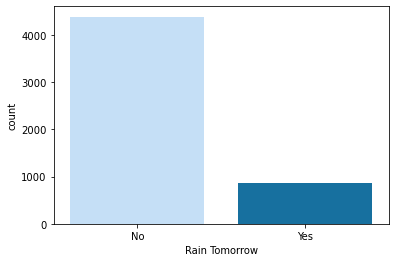

In [472]:
#Visual column 'Rain Tomorrow'
cols= ["#BDE0FE","#0077B6"]
sns.countplot(x= rain_data["Rain Tomorrow"], palette= cols)

In [473]:
data_n = myDATAtmp.copy()

<AxesSubplot:>

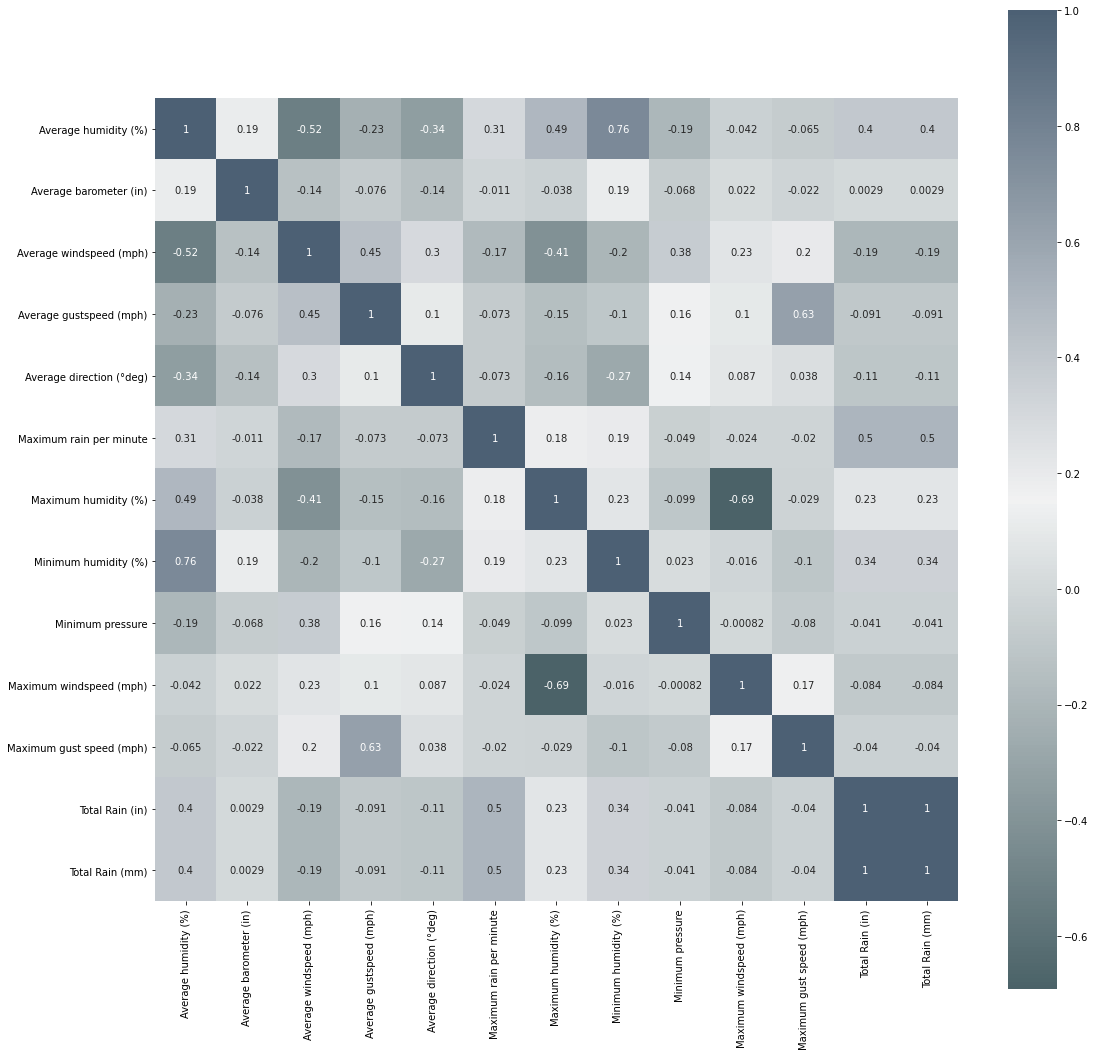

In [474]:
#Correlation numeric attributes
corrmat = data_n.corr()
cmap = sns.diverging_palette(-150,600,s=40, l=40, n=20, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [475]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      5661 non-null   object 
 1   Average temperature (°F)  5246 non-null   object 
 2   Average humidity (%)      5246 non-null   float64
 3   Average dewpoint (°F)     5246 non-null   object 
 4   Average barometer (in)    5246 non-null   float64
 5   Average windspeed (mph)   5246 non-null   float64
 6   Average gustspeed (mph)   5246 non-null   float64
 7   Average direction (°deg)  5246 non-null   float64
 8   Rainfall for month (in)   5246 non-null   object 
 9   Rainfall for year (in)    5246 non-null   object 
 10  Maximum rain per minute   5246 non-null   float64
 11  Maximum temperature (°F)  5246 non-null   object 
 12  Minimum temperature (°F)  5246 non-null   object 
 13  Maximum humidity (%)      5246 non-null   float64
 14  Minimum 

In [502]:
tmp =data_n.copy()

In [503]:
#Create DataFrame without columns 'Rainfall for year (in)',','Total Rain (in)'
tmp.drop(['Rainfall for year (in)','Total Rain (in)'],axis=1,inplace=True)
tmp

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Maximum rain per minute,...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Total Rain (mm),Rain Today,Rain Tomorrow
0,2006-01-01,36.2.2.4,44.0,15.9.8.9,29.491,13.2,18.1,250.0,0.000,0.00,...,29.2,29.8,34.0.254,45.000,62.0,31.0,41.5.5.3,0.000,No,NaN
1,2006-01-02,40.0.4.4,35.0,14.1.10.0,29.800,16.0,21.5,251.0,0.000,0.00,...,29.7,29.8,43.0.256,56.000,51.0,22.0,47.0.8.3,0.000,No,No
2,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,2006-01-04,33.5.0.8,48.0,15.3.9.3,30.039,12.7,17.3,252.0,0.070,0.01,...,29.6,30.5,39.0.259,62.000,89.0,33.0,43.3.6.3,0.000,No,NaN
4,2006-01-05,34.4.1.3,31.0,6.2.14.3,30.520,15.5,19.3,228.0,0.070,0.00,...,30.3,30.6,30.0.215,37.000,53.0,22.0,43.1.6.2,0.000,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,2021-06-27,52.6,77.0,44.8,29.900,2.0,3.4,307.0,1.26,0.00,...,95.0,45.0,29.976,29.877,12.7,18.4,63.9,0.000,No,Yes
5657,2021-06-28,50.7,81.0,44.7,30.000,1.4,2.4,266.0,1.40,0.01,...,95.0,53.0,30.109,29.941,18.4,25.3,62.1,3.556,Yes,No
5658,2021-06-29,51.5,79.0,44.5,30.000,1.4,2.7,123.0,1.40,0.00,...,97.0,57.0,30.118,29.975,9.2,12.7,63.8,0.000,No,Yes
5659,2021-06-30,58.1,68.0,46.5,29.900,2.2,3.8,324.0,1.40,0.00,...,97.0,44.0,29.998,29.847,11.5,17.3,77.5,0.000,No,No


In [504]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      5661 non-null   object 
 1   Average temperature (°F)  5246 non-null   object 
 2   Average humidity (%)      5246 non-null   float64
 3   Average dewpoint (°F)     5246 non-null   object 
 4   Average barometer (in)    5246 non-null   float64
 5   Average windspeed (mph)   5246 non-null   float64
 6   Average gustspeed (mph)   5246 non-null   float64
 7   Average direction (°deg)  5246 non-null   float64
 8   Rainfall for month (in)   5246 non-null   object 
 9   Maximum rain per minute   5246 non-null   float64
 10  Maximum temperature (°F)  5246 non-null   object 
 11  Minimum temperature (°F)  5246 non-null   object 
 12  Maximum humidity (%)      5246 non-null   float64
 13  Minimum humidity (%)      5246 non-null   float64
 14  Maximum 

In [505]:
#convert coulmn of 'Date' from type object to type datetime
#value lengths
lengths = tmp["Date"].str.len()
lengths.value_counts()

10    5661
Name: Date, dtype: int64

In [506]:
#Converting the column 'Date' to type datetime
tmp['Date']= pd.to_datetime(tmp["Date"])

#Creating a column of year,month,day
tmp['Year'] = tmp.Date.dt.year
tmp['Month'] = tmp.Date.dt.month
tmp['Day'] = tmp.Date.dt.day

Text(0.5, 0, 'Days In Year')

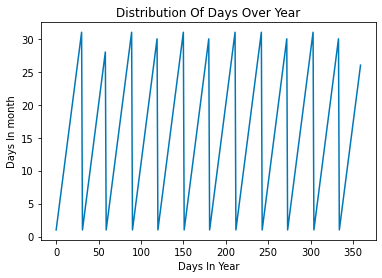

In [507]:
#Visual distriution
section = tmp[:360] 
tm = section["Day"].plot(color="#0077B6")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

## Categorical variables

In [508]:
# Creating a list of categorical variables
s = (tmp.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Average temperature (°F)', 'Average dewpoint (°F)', 'Rainfall for month (in)', 'Maximum temperature (°F)', 'Minimum temperature (°F)', 'Maximum pressure', 'Maximum heat index (°F)', 'Rain Today', 'Rain Tomorrow']


In [509]:
# Missing values in categorical variables
for i in object_cols:
    print(i, tmp[i].isnull().sum())

Average temperature (°F) 415
Average dewpoint (°F) 415
Rainfall for month (in) 415
Maximum temperature (°F) 415
Minimum temperature (°F) 415
Maximum pressure 415
Maximum heat index (°F) 415
Rain Today 415
Rain Tomorrow 415


In [510]:
# Filling missing values with mode of the column in value
for i in object_cols:
    tmp[i].fillna(tmp[i].mode()[0], inplace=True)

In [511]:
# Missing values in categorical variables (After changing)
for i in object_cols:
    print(i, tmp[i].isnull().sum())

Average temperature (°F) 0
Average dewpoint (°F) 0
Rainfall for month (in) 0
Maximum temperature (°F) 0
Minimum temperature (°F) 0
Maximum pressure 0
Maximum heat index (°F) 0
Rain Today 0
Rain Tomorrow 0


In [512]:
# Creating a list of numeric variables
t = (tmp.dtypes == "float64")
num_cols = list(t[t].index)
print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['Average humidity (%)', 'Average barometer (in)', 'Average windspeed (mph)', 'Average gustspeed (mph)', 'Average direction (°deg)', 'Maximum rain per minute', 'Maximum humidity (%)', 'Minimum humidity (%)', 'Minimum pressure', 'Maximum windspeed (mph)', 'Maximum gust speed (mph)', 'Total Rain (mm)']


In [513]:
# Missing values in numeric variables
for i in num_cols:
    print(i, tmp[i].isnull().sum())

Average humidity (%) 415
Average barometer (in) 415
Average windspeed (mph) 415
Average gustspeed (mph) 415
Average direction (°deg) 415
Maximum rain per minute 415
Maximum humidity (%) 415
Minimum humidity (%) 415
Minimum pressure 415
Maximum windspeed (mph) 415
Maximum gust speed (mph) 415
Total Rain (mm) 415


In [514]:
# Filling missing values with median of the column in valu
for i in num_cols:
    tmp[i].fillna(tmp[i].median(), inplace=True) 
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      5661 non-null   datetime64[ns]
 1   Average temperature (°F)  5661 non-null   object        
 2   Average humidity (%)      5661 non-null   float64       
 3   Average dewpoint (°F)     5661 non-null   object        
 4   Average barometer (in)    5661 non-null   float64       
 5   Average windspeed (mph)   5661 non-null   float64       
 6   Average gustspeed (mph)   5661 non-null   float64       
 7   Average direction (°deg)  5661 non-null   float64       
 8   Rainfall for month (in)   5661 non-null   object        
 9   Maximum rain per minute   5661 non-null   float64       
 10  Maximum temperature (°F)  5661 non-null   object        
 11  Minimum temperature (°F)  5661 non-null   object        
 12  Maximum humidity (%)

Text(0.5, 0, 'Years')

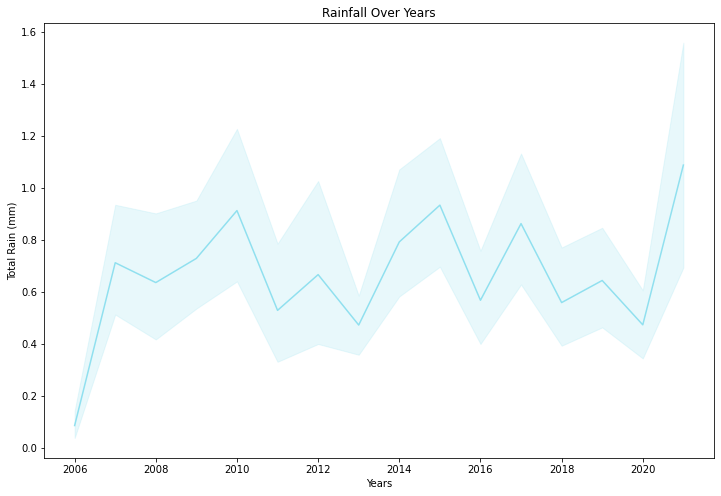

In [515]:
#Plotting a lineplot rainfall over years
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=tmp['Date'].dt.year,y="Total Rain (mm)",data=tmp,color="#90E0EF")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Total Rain (mm)")
Time_series.set_xlabel("Years")

Text(0.5, 0, 'Year')

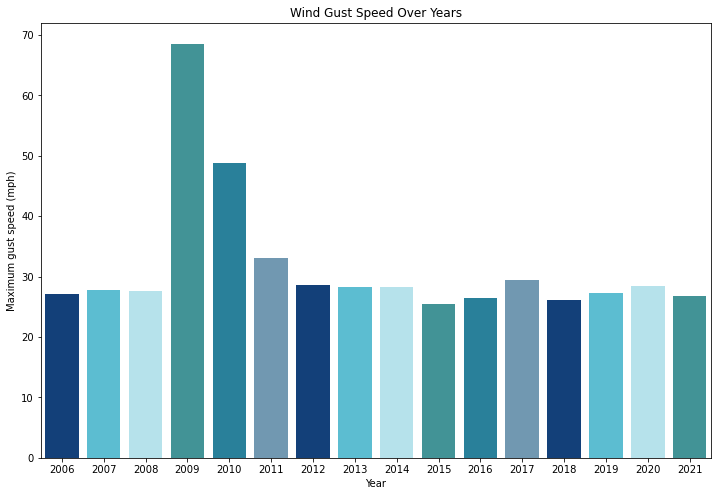

In [516]:
#Evauating Wind gust speed over years
colours = ["#023E8A", "#48CAE4", "#ADE8F4", "#34A0A4", "#168AAD",'#669BBC']
plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=tmp['Date'].dt.year,y="Maximum gust speed (mph)",data=tmp, ci =None,palette = colours)
Days_of_week.set_title("Wind Gust Speed Over Years")
Days_of_week.set_ylabel("Maximum gust speed (mph)")
Days_of_week.set_xlabel("Year")

# Data Preprocessing

In [518]:
# Apply label encoder to each column with categorical data - correct the types
le = LabelEncoder()
for i in object_cols:
    tmp[i] = le.fit_transform(tmp[i])
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      5661 non-null   datetime64[ns]
 1   Average temperature (°F)  5661 non-null   int32         
 2   Average humidity (%)      5661 non-null   float64       
 3   Average dewpoint (°F)     5661 non-null   int32         
 4   Average barometer (in)    5661 non-null   float64       
 5   Average windspeed (mph)   5661 non-null   float64       
 6   Average gustspeed (mph)   5661 non-null   float64       
 7   Average direction (°deg)  5661 non-null   float64       
 8   Rainfall for month (in)   5661 non-null   int32         
 9   Maximum rain per minute   5661 non-null   float64       
 10  Maximum temperature (°F)  5661 non-null   int32         
 11  Minimum temperature (°F)  5661 non-null   int32         
 12  Maximum humidity (%)

In [519]:
# Prepairing attributes of scale data
# dropping target and extra columns
featur = tmp.drop(['Rain Tomorrow', 'Date','Day', 'Month'], axis=1) 
target = tmp['Rain Tomorrow']

#Set up a standard scaler for the features
names_of_cols = list(featur.columns)
s_scaler = preprocessing.StandardScaler()
featur = s_scaler.fit_transform(featur)
featur = pd.DataFrame(featur, columns=names_of_cols) 

featur.describe().T

,count,mean,std,min,25%,50%,75%,max
Average temperature (°F),5661.0,1.914502e-16,1.000088,-2.263275,-0.787872,0.078798,0.969542,1.733037
Average humidity (%),5661.0,5.656970e-16,1.000088,-2.381273,-0.717768,-0.123660,0.648681,2.668651
Average dewpoint (°F),5661.0,5.410891e-17,1.000088,-1.584536,-0.948092,-0.112759,0.780432,2.009925
Average barometer (in),5661.0,2.200253e-15,1.000088,-6.578952,-0.738347,0.040400,0.429774,4.323511
Average windspeed (mph),5661.0,8.053284e-16,1.000088,-1.444783,-0.746925,-0.298303,0.499249,5.135018
Average gustspeed (mph),5661.0,1.199452e-15,1.000088,-0.794051,-0.414430,-0.208115,0.179759,19.045265
Average direction (°deg),5661.0,2.946180e-16,1.000088,-2.322332,-0.572304,0.345393,0.676191,1.519193
Rainfall for month (in),5661.0,5.476786e-16,1.000088,-0.943136,-0.884512,-0.273146,0.639716,2.984682
Maximum rain per minute,5661.0,9.610362e-16,1.000088,-0.339292,-0.339292,-0.339292,0.496863,24.745379
Maximum temperature (°F),5661.0,2.916272e-16,1.000088,-2.179463,-0.832613,0.032971,0.974728,1.691432


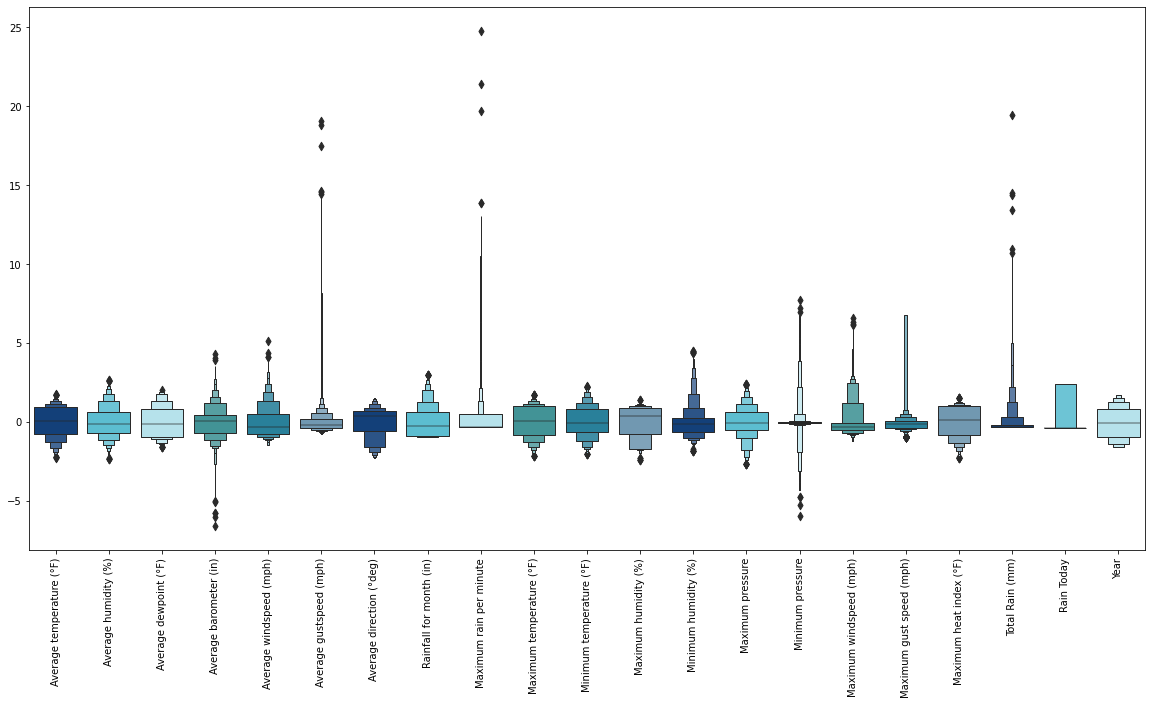

In [521]:
#Detecting outliers
#looking at the scaled features
colours = ["#023E8A", "#48CAE4", "#ADE8F4", "#34A0A4", "#168AAD","#669BBC"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = featur,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [522]:
#Full data
featur["Rain Tomorrow"] = target

#Dropping outliers
featur = featur[(featur["Average barometer (in)"]<2.8)&(featur["Average barometer (in)"]>-2.3)]
featur = featur[(featur["Average windspeed (mph)"]<3)&(featur["Average windspeed (mph)"]>-3)]
featur = featur[(featur["Average gustspeed (mph)"]<3)&(featur["Average gustspeed (mph)"]>-3)]
featur = featur[(featur["Maximum rain per minute"]<3)&(featur["Maximum rain per minute"]>-3)]
featur = featur[(featur["Minimum humidity (%)"]<3)&(featur["Minimum humidity (%)"]>-3)]
featur = featur[(featur["Minimum pressure"]<3)&(featur["Minimum pressure"]>-3)]
featur = featur[(featur["Maximum windspeed (mph)"]<3)&(featur["Maximum windspeed (mph)"]>-3)]
featur = featur[(featur["Maximum gust speed (mph)"]<3)&(featur["Maximum gust speed (mph)"]>-3)]
featur = featur[(featur["Minimum pressure"]<3)&(featur["Minimum pressure"]>-3)]
featur = featur[(featur["Rain Today"]<3)&(featur["Rain Today"]>-3)]
featur = featur[(featur["Total Rain (mm)"]<3)&(featur["Total Rain (mm)"]>-3)]
featur = featur[(featur["Maximum gust speed (mph)"]<1)&(featur["Maximum gust speed (mph)"]>-1)]
featur = featur[(featur["Maximum heat index (°F)"]<3)&(featur["Maximum heat index (°F)"]>-3)]
featur = featur[(featur["Average temperature (°F)"]<2)&(featur["Average temperature (°F)"]>-2)]
featur = featur[(featur["Average humidity (%)"]<3)&(featur["Average humidity (%)"]>-3)]
featur = featur[(featur["Rainfall for month (in)"]<3)]
featur = featur[(featur["Maximum pressure"]<3)&(featur["Maximum pressure"]>-3)]

featur.shape

(4818, 22)

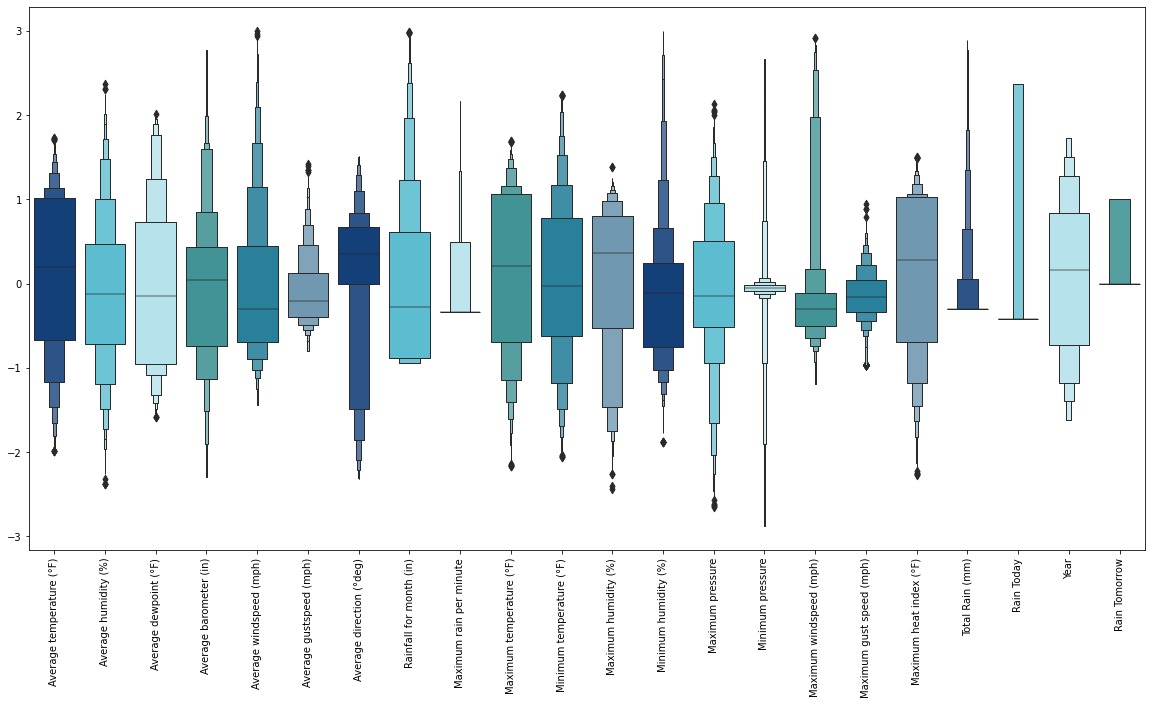

In [523]:
#Looking at the scaled features without outliers
plt.figure(figsize=(20,10))
sns.boxenplot(data = featur,palette = [colours])
plt.xticks(rotation=90)
plt.show()

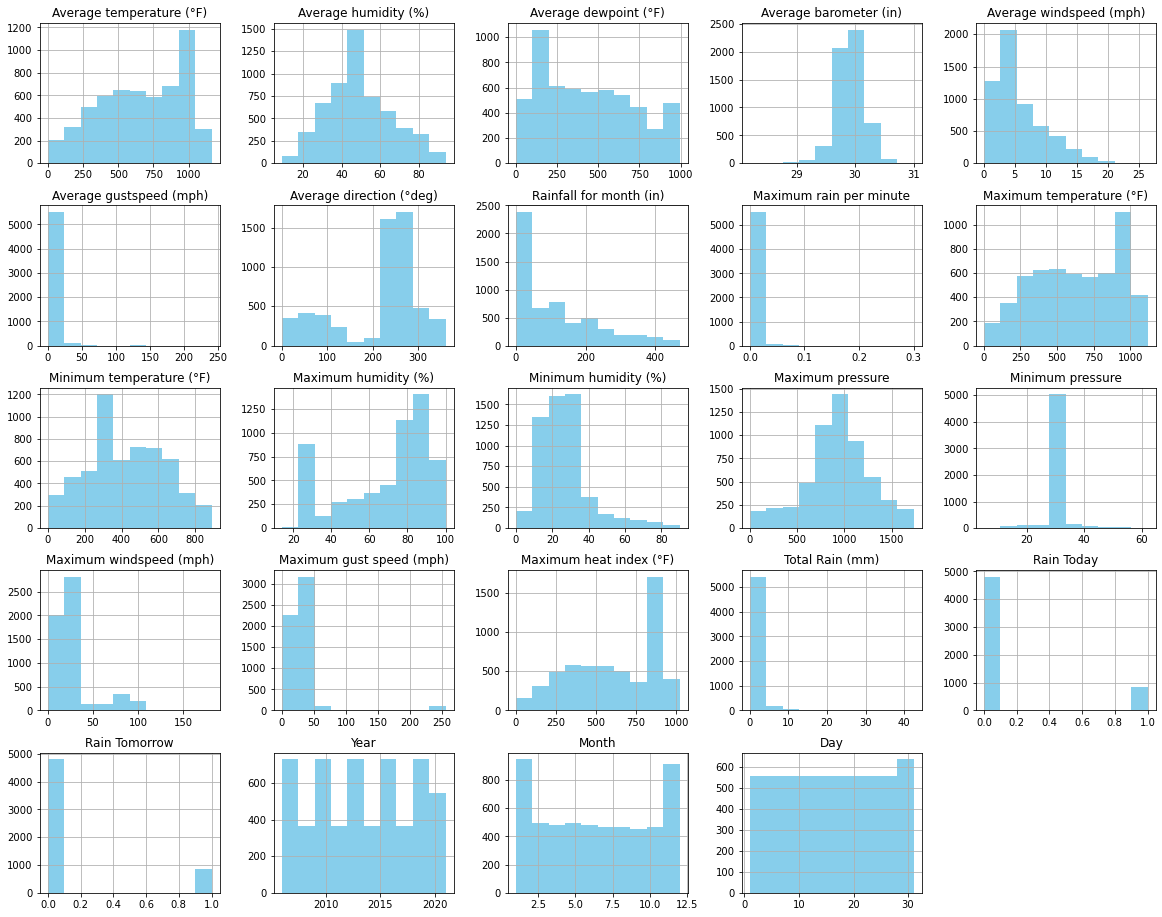

In [527]:
#Visual Matplotlib Histogram 
%matplotlib inline
tmp.hist(figsize=(20,16), color = "skyblue");
plt.show();

# Model Building

In [529]:
X = featur.drop(["Rain Tomorrow"], axis=1)
y = featur["Rain Tomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X.shape

(4818, 21)

## Logistic Regression

In [530]:
clf_logreg = LogisticRegression(random_state=0)
clf_logreg.fit(X_train,y_train)
y_pred_1 = clf_logreg.predict(X_test)
score_1 = accuracy_score(y_test,y_pred_1)
print('Accuracy:',score_1)

Accuracy: 0.8734439834024896


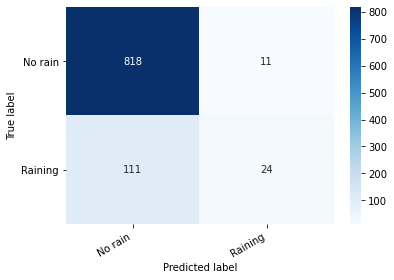

In [543]:
cm = confusion_matrix(y_test, y_pred_1)
classes = ['No rain', 'Raining']
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

## Random Forest

In [544]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred_2 = clf_rf.predict(X_test)
score_2 = accuracy_score(y_test,y_pred_2)
print('Accuracy :',score_2)

Accuracy : 0.8734439834024896


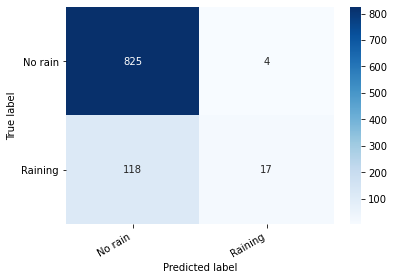

In [545]:
cm = confusion_matrix(y_test, y_pred_2)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

## KNN 

In [546]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred_3 = knn.predict(X_test)
score_3 = accuracy_score(y_test,y_pred_3)
print('Accuracy :',score_3)

Accuracy : 0.8464730290456431


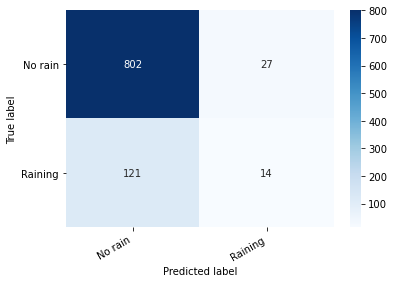

In [547]:
cm = confusion_matrix(y_test, y_pred_3)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

## Final Result

In [548]:
print(f'Scores for different models: \nLinear Regresion {score_1}\nRandom Forest {score_2} \nKNeighborsClassifier {score_3} ')

Scores for different models: 
Linear Regresion 0.8734439834024896
Random Forest 0.8734439834024896 
KNeighborsClassifier 0.8464730290456431 
